# Support Vector Machines

In [ ]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving hmelq.csv to hmelq.csv


In [ ]:
import io
import pandas as pd
bank=pd.read_csv("hmelq.csv")
df=bank.copy()
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   int64  
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null   float64
 4   reason   2018 non-null   object 
 5   job      2018 non-null   object 
 6   yoj      2018 non-null   float64
 7   derog    2018 non-null   float64
 8   delinq   2018 non-null   float64
 9   clage    2018 non-null   float64
 10  ninq     2018 non-null   float64
 11  clno     2018 non-null   float64
 12  debtinc  2018 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


## Dummy encoding

In [ ]:
dms=pd.get_dummies(df[["job","reason"]])
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,reason_DebtCon
153,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,0,0,0,1
154,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,0,0,0,1
155,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,0,0,0,1
156,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0
157,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## Feature Elimination

 In previous studies, after implemantation of t-test "loan","mortdue","value","clno" were found as ineffective. For chi^2 test, "reason" was found as ineffective.
 In addition , variance inflation factor was applied, as a result,  "mortdue","value" and "debtinc" were found as variables that had multicollinearity .

In [ ]:
X_train=X_train.drop(["value","mortdue","clno","reason_DebtCon"],axis=1)

In [ ]:
X_test=X_test.drop(["value","mortdue","clno","reason_DebtCon"],axis=1)

# SVM

In [ ]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9326732673267327

In [ ]:
y_pred = svm_model.predict(X_train)
accuracy_score(y_train, y_pred)

0.914738929279577

## Model Tuning


In [ ]:
svc_params = {"C": np.arange(1,5,1)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

It takes a long time....

### c=5

In [ ]:
svc_tuned1 = SVC(kernel = "linear", C = 5,random_state=42).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned1.predict(X_test)
accuracy_score(y_test, y_pred)

0.9287128712871288

In [ ]:
y_pred = svc_tuned1.predict(X_train)
accuracy_score(y_train, y_pred)

0.9173826834104428

In [ ]:
print(classification_report(y_train,svc_tuned1.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1374
           1       0.68      0.19      0.29       139

    accuracy                           0.92      1513
   macro avg       0.80      0.59      0.62      1513
weighted avg       0.90      0.92      0.90      1513



In [ ]:
print(classification_report(y_test,svc_tuned1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       466
           1       0.62      0.21      0.31        39

    accuracy                           0.93       505
   macro avg       0.78      0.60      0.64       505
weighted avg       0.91      0.93      0.91       505



In [ ]:
cross_val_score(svc_tuned1,X_test,y_test, cv=10).mean()

0.9267058823529413

### c=6

In [ ]:
svc_tuned3 = SVC(kernel = "linear", C = 6,random_state=42).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned3.predict(X_test)
accuracy_score(y_test, y_pred)

0.9306930693069307

In [ ]:
y_pred = svc_tuned3.predict(X_train)
accuracy_score(y_train, y_pred)

0.9180436219431592

In [ ]:
print(classification_report(y_train,svc_tuned3.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1374
           1       0.76      0.16      0.26       139

    accuracy                           0.92      1513
   macro avg       0.84      0.58      0.61      1513
weighted avg       0.91      0.92      0.89      1513



In [ ]:
print(classification_report(y_test,svc_tuned3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       466
           1       0.67      0.21      0.31        39

    accuracy                           0.93       505
   macro avg       0.80      0.60      0.64       505
weighted avg       0.92      0.93      0.91       505



### c=8

In [ ]:
svc_tuned4 = SVC(kernel = "linear", C = 8,random_state=42).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned4.predict(X_test)
accuracy_score(y_test, y_pred)

0.9267326732673268

In [ ]:
y_pred = svc_tuned4.predict(X_train)
accuracy_score(y_train, y_pred)

0.914738929279577

In [ ]:
print(classification_report(y_train,svc_tuned4.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1374
           1       0.64      0.17      0.26       139

    accuracy                           0.91      1513
   macro avg       0.78      0.58      0.61      1513
weighted avg       0.90      0.91      0.89      1513



In [ ]:
print(classification_report(y_test,svc_tuned4.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       466
           1       0.60      0.15      0.24        39

    accuracy                           0.93       505
   macro avg       0.77      0.57      0.60       505
weighted avg       0.91      0.93      0.91       505



### c=10

In [ ]:
svc_tuned2 = SVC(kernel = "linear", C = 10,random_state=42).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned2.predict(X_test)
accuracy_score(y_test, y_pred)

0.9267326732673268

In [ ]:
y_pred = svc_tuned2.predict(X_train)
accuracy_score(y_train, y_pred)

0.9160608063450099

In [ ]:
print(classification_report(y_train,svc_tuned2.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1374
           1       0.70      0.15      0.25       139

    accuracy                           0.92      1513
   macro avg       0.81      0.57      0.60      1513
weighted avg       0.90      0.92      0.89      1513



In [ ]:
print(classification_report(y_test,svc_tuned2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       466
           1       0.60      0.15      0.24        39

    accuracy                           0.93       505
   macro avg       0.77      0.57      0.60       505
weighted avg       0.91      0.93      0.91       505



# RBF SVC

In [ ]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)
svc_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:

svc_params = {"C": np.arange(0, 5, 0.1),
             "gamma": np.arange(0.1, 5, 0.1)}
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)             

Fitting 10 folds for each of 2450 candidates, totalling 24500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 832 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 1035 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 1318 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1683 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2128 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2655 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3262 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3951 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4720 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 5571 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 6502 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 7515 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 8608 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 9783 tasks      

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,...
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
                         'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])}

In [ ]:
str(svc_cv_model.best_params_)

"{'C': 0.1, 'gamma': 0.1}"

In [ ]:
svc_tuned = SVC(kernel="rbf",C = 0.1, gamma = 0.1).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9227722772277228

In [ ]:
y_pred = svc_tuned.predict(X_train)
accuracy_score(y_train, y_pred)

0.9081295439524124

In [ ]:
print(classification_report(y_train,svc_tuned.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1374
           1       0.00      0.00      0.00       139

    accuracy                           0.91      1513
   macro avg       0.45      0.50      0.48      1513
weighted avg       0.82      0.91      0.86      1513



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_train,svc_tuned.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1374
           1       0.00      0.00      0.00       139

    accuracy                           0.91      1513
   macro avg       0.45      0.50      0.48      1513
weighted avg       0.82      0.91      0.86      1513



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naive Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.904950495049505

In [ ]:
print(classification_report(y_test,nb_model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       466
           1       0.45      0.38      0.42        39

    accuracy                           0.92       505
   macro avg       0.70      0.67      0.69       505
weighted avg       0.91      0.92      0.91       505



In [ ]:
y_pred = nb_model.predict(X_train)
accuracy_score(y_train, y_pred)

0.8968935888962326

In [ ]:
print(classification_report(y_train,nb_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1374
           1       0.41      0.38      0.40       139

    accuracy                           0.89      1513
   macro avg       0.67      0.66      0.67      1513
weighted avg       0.89      0.89      0.89      1513



In [ ]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.9306666666666669

In [ ]:
cross_val_score(nb_model, X_train, y_train, cv = 10).mean()

0.8949154757755317

## Model Tuning

In [ ]:
nb_params={"priors":[(0.1,0.9),(0.2,0.8)]}

In [ ]:
nb_model=GaussianNB()

In [ ]:
nb_cv=GridSearchCV(nb_model,nb_params,cv=10,n_jobs = -1,verbose = 2)
nb_cv.fit(X_train,y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.6s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=-1,
             param_grid={'priors': [(0.1, 0.9), (0.2, 0.8)]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
nb_cv.best_score_

0.7521348902056466

In [ ]:
nb_cv.best_params_

{'priors': (0.2, 0.8)}

In [ ]:
nb_tuned=GaussianNB(priors=(0.2, 0.8))
nb_tuned.fit(X_train,y_train)

GaussianNB(priors=(0.2, 0.8), var_smoothing=1e-09)

In [ ]:
y_pred = nb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8712871287128713

In [ ]:
print(classification_report(y_test,nb_tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       466
           1       0.31      0.54      0.39        39

    accuracy                           0.87       505
   macro avg       0.63      0.72      0.66       505
weighted avg       0.91      0.87      0.89       505



In [ ]:
y_pred = nb_tuned.predict(X_train)
accuracy_score(y_train, y_pred)

0.8493060145406477

In [ ]:
print(classification_report(y_train,nb_tuned.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1374
           1       0.32      0.55      0.40       139

    accuracy                           0.85      1513
   macro avg       0.63      0.72      0.66      1513
weighted avg       0.89      0.85      0.87      1513



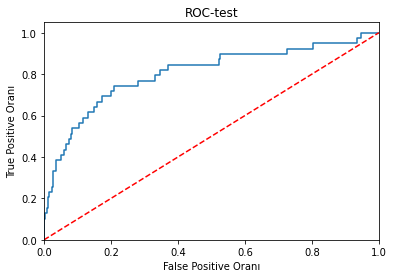

In [ ]:

nb_roc_auc=roc_auc_score(y_test,nb_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, nb_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC-test')
plt.show()

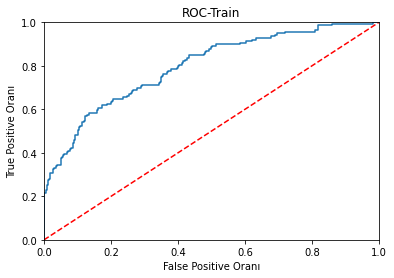

In [ ]:

nb_roc_auc=roc_auc_score(y_train,nb_tuned.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, nb_tuned.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC-Train')
plt.show()

# Gradient Boosting Machines


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [ ]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9564356435643564

In [ ]:
print(classification_report(y_test,gbm_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       466
           1       0.95      0.46      0.62        39

    accuracy                           0.96       505
   macro avg       0.95      0.73      0.80       505
weighted avg       0.96      0.96      0.95       505



In [ ]:
y_pred = gbm_model.predict(X_train)
accuracy_score(y_train, y_pred)

0.9623265036351619

In [ ]:
print(classification_report(y_train,gbm_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1374
           1       1.00      0.59      0.74       139

    accuracy                           0.96      1513
   macro avg       0.98      0.79      0.86      1513
weighted avg       0.96      0.96      0.96      1513



## Model Tuning

In [ ]:
gbm_params = {"learning_rate" : [ 0.01, 0.1, 0.05],
             "n_estimators": [100,200,500],
             "max_depth": [3,5,7],
            "criterion":['friedman_mse', 'mse', 'mae']}

In [ ]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 81.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [ ]:
gbm_cv.best_params_

{'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [ ]:
gbm = GradientBoostingClassifier(learning_rate = 0.1, 
                                 max_depth = 3,
                                criterion="mse",
                                n_estimators = 100)

In [ ]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9564356435643564

In [ ]:
print(classification_report(y_test,gbm_tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       466
           1       0.95      0.46      0.62        39

    accuracy                           0.96       505
   macro avg       0.95      0.73      0.80       505
weighted avg       0.96      0.96      0.95       505



In [ ]:
y_pred = gbm_tuned.predict(X_train)
accuracy_score(y_train, y_pred)

0.9623265036351619

In [ ]:
print(classification_report(y_train,gbm_tuned.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1374
           1       1.00      0.59      0.74       139

    accuracy                           0.96      1513
   macro avg       0.98      0.79      0.86      1513
weighted avg       0.96      0.96      0.96      1513



# XGBoost


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [ ]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9504950495049505

In [ ]:
print(classification_report(y_test,xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       466
           1       0.94      0.38      0.55        39

    accuracy                           0.95       505
   macro avg       0.94      0.69      0.76       505
weighted avg       0.95      0.95      0.94       505



In [ ]:
y_pred = xgb_model.predict(X_train)
accuracy_score(y_train, y_pred)

0.9517514871116987

In [ ]:
print(classification_report(y_train,xgb_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1374
           1       1.00      0.47      0.64       139

    accuracy                           0.95      1513
   macro avg       0.97      0.74      0.81      1513
weighted avg       0.95      0.95      0.94      1513





## Model Tuning

In [ ]:
xgb_params = {
        'n_estimators': [100, 500, 1000],
        'subsample': [0, 0.5, 1.0],
        'max_depth': [3,5,7],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "sampling_method": ["uniform", "gradient_based"]}

In [ ]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 182 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 712 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1097 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1586 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 2157 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 15.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000],
   

In [ ]:
xgb_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 1000,
 'sampling_method': 'uniform',
 'subsample': 0.5}

In [ ]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 5,
                    sampling_method = 'uniform',
                    n_estimators = 1000,
                    subsample = 0.5)

In [ ]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9544554455445544

In [ ]:
print(classification_report(y_test,xgb_tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       466
           1       0.90      0.46      0.61        39

    accuracy                           0.95       505
   macro avg       0.93      0.73      0.79       505
weighted avg       0.95      0.95      0.95       505



In [ ]:
y_pred = xgb_tuned.predict(X_train)
accuracy_score(y_train, y_pred)

0.9722405816259088

In [ ]:
print(classification_report(y_train,xgb_tuned.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1374
           1       1.00      0.70      0.82       139

    accuracy                           0.97      1513
   macro avg       0.99      0.85      0.90      1513
weighted avg       0.97      0.97      0.97      1513



# KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [64]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9128712871287129

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       466
           1       0.14      0.03      0.04        39

    accuracy                           0.91       505
   macro avg       0.53      0.51      0.50       505
weighted avg       0.86      0.91      0.88       505




## Model Tuning

In [ ]:
knn_params = {"n_neighbors": np.arange(3,50), "weights":["uniform", "distance"]}

In [ ]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.9081300104566052
En iyi parametreler: {'n_neighbors': 10, 'weights': 'uniform'}


In [ ]:
knn = KNeighborsClassifier(10)
knn_tuned = knn.fit(X_train, y_train)

In [ ]:
knn_tuned.score(X_test, y_test)

0.9227722772277228

In [ ]:
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9227722772277228

In [ ]:
print(classification_report(y_test, knn_tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       466
           1       0.00      0.00      0.00        39

    accuracy                           0.92       505
   macro avg       0.46      0.50      0.48       505
weighted avg       0.85      0.92      0.89       505



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = knn_tuned.predict(X_train)
accuracy_score(y_train, y_pred)

0.9081295439524124

In [ ]:
print(classification_report(y_train, knn_tuned.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1374
           1       0.00      0.00      0.00       139

    accuracy                           0.91      1513
   macro avg       0.45      0.50      0.48      1513
weighted avg       0.82      0.91      0.86      1513



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


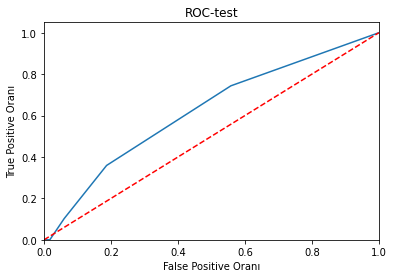

In [ ]:

nb_roc_auc=roc_auc_score(y_test,knn_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC-test')
plt.show()

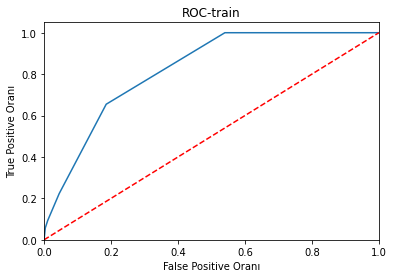

In [ ]:
nb_roc_auc=roc_auc_score(y_train,knn_tuned.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, knn_tuned.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC-train')
plt.show()

In [73]:
def knn_result(model,X_train,X_test,y_train,y_test):
  print("         ******** KNN RESULT*******      ")
  y_pred = model.predict(X_test)
  print("TEST accuracy=",accuracy_score(y_test, y_pred))
  print("TEST report=\n",classification_report(y_test, model.predict(X_test)),"\n")
  y_pred = model.predict(X_train)
  print("TRAIN accuracy=",accuracy_score(y_train, y_pred))
  print("TRAIN report=\n",classification_report(y_train, model.predict(X_train)),"\n")
  print("ROC CURVES")
  nb_roc_auc=roc_auc_score(y_test,model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % nb_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Oranı')
  plt.ylabel('True Positive Oranı')
  plt.title('ROC-TEST')
  plt.show()
  nb_roc_auc=roc_auc_score(y_train,model.predict(X_train))
  fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % nb_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Oranı')
  plt.ylabel('True Positive Oranı')
  plt.title('ROC-TRAIN')
  plt.show()

         ******** KNN RESULT*******      
TEST accuracy= 0.9227722772277228
TEST report=
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       466
           1       0.00      0.00      0.00        39

    accuracy                           0.92       505
   macro avg       0.46      0.50      0.48       505
weighted avg       0.85      0.92      0.89       505
 

TRAIN accuracy= 0.9081295439524124
TRAIN report=
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1374
           1       0.00      0.00      0.00       139

    accuracy                           0.91      1513
   macro avg       0.45      0.50      0.48      1513
weighted avg       0.82      0.91      0.86      1513
 

ROC CURVES


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


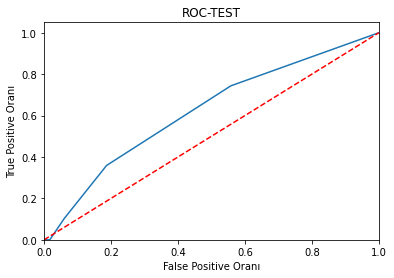

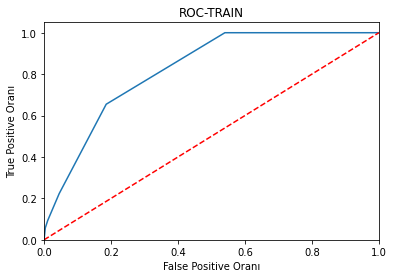

In [74]:
knn_result(model=knn_tuned,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)